In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import RobustScaler

# Load the dataset and explore the variables.

In [2]:
df=pd.read_csv('customer_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df['Churn'].describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

# We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

# Extract the target variable.

# Extract the independent variables and scale them.

In [6]:
#split the data 
y = (df.Churn == 'Yes').astype(int)
X=df[['tenure', 'SeniorCitizen','MonthlyCharges']]

In [7]:
y.unique()

array([0, 1])

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [9]:
scaler= RobustScaler()
scaler.fit(X)
X_num_scaled=pd.DataFrame(scaler.transform(X),columns=X.columns)

# Build the logistic regression model.

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_num_scaled, y, test_size = .25, random_state = 33)

In [11]:
classification=LogisticRegression(max_iter=500)

In [12]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [13]:
y_test_pred=classification.predict(X_test)

# Evaluate the model

In [14]:
accuracy_score(y_test, y_test_pred)

0.7915956842703009

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
confusion_matrix(y_test,y_test_pred)

array([[1181,  100],
       [ 267,  213]])

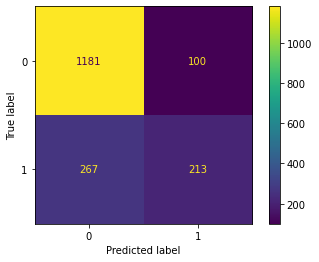

In [17]:
cmx=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cmx)
disp.plot();

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
y_pred_probs=classification.predict_proba(X_test)[::,1]

In [20]:
y_pred_probs

array([0.3274999 , 0.52779092, 0.44261328, ..., 0.02467331, 0.03983416,
       0.18095759])

In [21]:
y_test

5832    1
6754    0
126     1
6930    1
4200    0
       ..
4644    0
4995    1
2119    0
5717    0
2636    0
Name: Churn, Length: 1761, dtype: int64

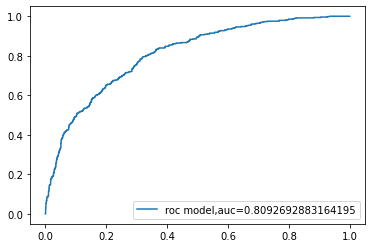

In [22]:
fpr,tpr, _ = roc_curve(y_test,y_pred_probs, pos_label=1 )
auc=roc_auc_score(y_test,y_pred_probs)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();

# Even a simple model will give us more than 70% accuracy. Why?

This is due to the fact that the sample of Churn is very little compared to the non Churn. Therefore, the model will predict most of the cases as no churn but it won't really gives us much info since there will be a lot of false yes due to the data set and we won't be really able to predict the churn cases thats is what we want. 

# Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [23]:
import imblearn

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_num_scaled, y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)


In [26]:
classification=LogisticRegression(max_iter=500)

In [27]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [28]:
y_test_pred=classification.predict(X_test)

In [29]:
accuracy_score(y_test, y_test_pred)

0.7533822960958639

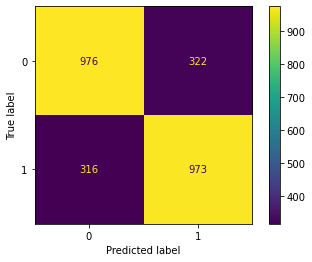

In [30]:
cm_res=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_res)
disp.plot();

In [31]:
y_pred_probs=classification.predict_proba(X_test)[::,1]

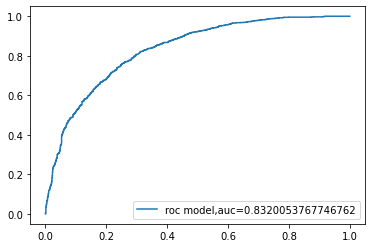

In [32]:
fpr,tpr,_=roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();

# Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [33]:
from imblearn.under_sampling import EditedNearestNeighbours
>>> enn = EditedNearestNeighbours()
>>> X_resampled, y_resampled = enn.fit_resample(X, y)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [35]:
classification=LogisticRegression(max_iter=500)

In [36]:
classification.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [37]:
y_test_pred=classification.predict(X_test)

In [38]:
accuracy_score(y_test, y_test_pred)

0.8060654429369514

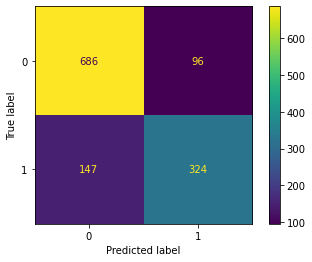

In [39]:
cm_res=confusion_matrix(y_test,y_test_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_res)
disp.plot();

In [40]:
y_pred_probs=classification.predict_proba(X_test)[::,1]

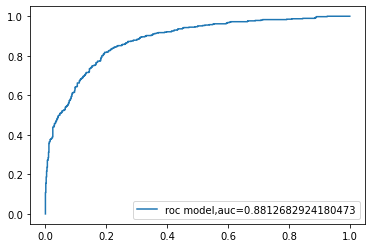

In [41]:
fpr,tpr,_=roc_curve(y_test,y_pred_probs)
auc=roc_auc_score(y_test,y_pred_probs)
plt.plot(fpr,tpr,label='roc model,auc='+str(auc))
plt.legend(loc=4)
plt.show();